In [18]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [65]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [66]:
df = pd.DataFrame()

In [67]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [68]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<AxesSubplot:xlabel='X1', ylabel='X2'>

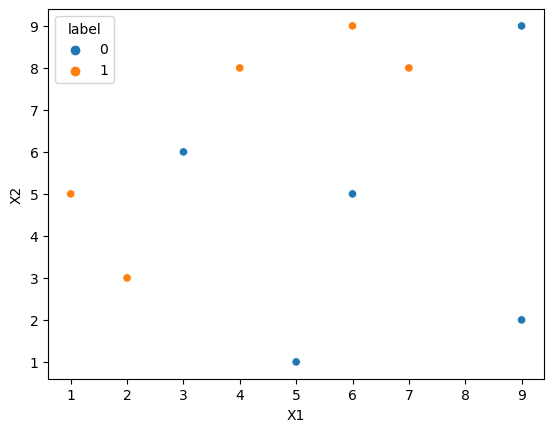

In [69]:
import seaborn as sns
sns.scatterplot(x = df['X1'], y = df['X2'], hue=df['label'])

In [70]:
df['weight'] = 1/df.shape[0]

In [71]:
df.sample(3)

,X1,X2,label,weight
5,6,9,1,0.1
0,1,5,1,0.1
9,9,2,0,0.1


In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [74]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [75]:
X

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]], dtype=int64)

In [76]:
y

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [77]:
dt1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

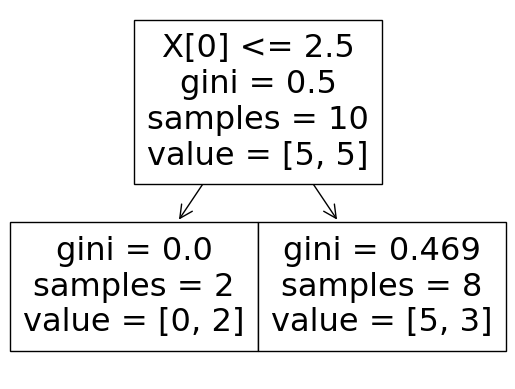

In [78]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<AxesSubplot:>

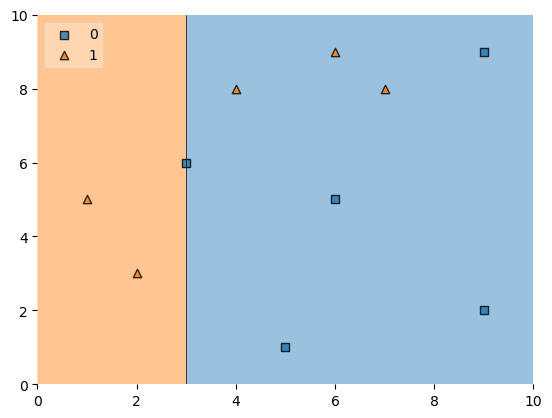

In [79]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [80]:
df['y_pred'] = dt1.predict(X)

In [81]:
df

,X1,X2,label,weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [82]:
def calculate_model_weight(error):
    return (0.5 * np.log((1-error)/error))

In [83]:
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [84]:
def updated_weights(row, alpha=0.424):
    if row['label'] == row['y_pred']:
        return row['weight'] * np.exp(-alpha)
    else:
        return row['weight'] * np.exp(alpha)

In [85]:
df['updated_weight'] = df.apply(updated_weights, axis=1)

In [86]:
df

,X1,X2,label,weight,y_pred,updated_weight
0,1,5,1,0.1,1,0.065442
1,2,3,1,0.1,1,0.065442
2,3,6,0,0.1,0,0.065442
3,4,8,1,0.1,0,0.152806
4,5,1,0,0.1,0,0.065442
5,6,9,1,0.1,0,0.152806
6,6,5,0,0.1,0,0.065442
7,7,8,1,0.1,0,0.152806
8,9,9,0,0.1,0,0.065442
9,9,2,0,0.1,0,0.065442


In [87]:
df['updated_weight'].sum()

0.9165151954714182

In [88]:
df['normalized_weight'] = df['updated_weight']/df['updated_weight'].sum()

In [89]:
df

,X1,X2,label,weight,y_pred,updated_weight,normalized_weight
0,1,5,1,0.1,1,0.065442,0.071403
1,2,3,1,0.1,1,0.065442,0.071403
2,3,6,0,0.1,0,0.065442,0.071403
3,4,8,1,0.1,0,0.152806,0.166725
4,5,1,0,0.1,0,0.065442,0.071403
5,6,9,1,0.1,0,0.152806,0.166725
6,6,5,0,0.1,0,0.065442,0.071403
7,7,8,1,0.1,0,0.152806,0.166725
8,9,9,0,0.1,0,0.065442,0.071403
9,9,2,0,0.1,0,0.065442,0.071403


In [90]:
df['normalized_weight'].sum()

1.0000000000000002

In [91]:
df['cumsum_upper'] = np.cumsum(df['normalized_weight'])

In [92]:
df.sample(3)

,X1,X2,label,weight,y_pred,updated_weight,normalized_weight,cumsum_upper
1,2,3,1,0.1,1,0.065442,0.071403,0.142807
0,1,5,1,0.1,1,0.065442,0.071403,0.071403
4,5,1,0,0.1,0,0.065442,0.071403,0.452339


In [93]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weight']

In [94]:
df

,X1,X2,label,weight,y_pred,updated_weight,normalized_weight,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065442,0.071403,0.071403,0.000000
1,2,3,1,0.1,1,0.065442,0.071403,0.142807,0.071403
2,3,6,0,0.1,0,0.065442,0.071403,0.214210,0.142807
3,4,8,1,0.1,0,0.152806,0.166725,0.380936,0.214210
4,5,1,0,0.1,0,0.065442,0.071403,0.452339,0.380936
5,6,9,1,0.1,0,0.152806,0.166725,0.619064,0.452339
6,6,5,0,0.1,0,0.065442,0.071403,0.690468,0.619064
7,7,8,1,0.1,0,0.152806,0.166725,0.857193,0.690468
8,9,9,0,0.1,0,0.065442,0.071403,0.928597,0.857193
9,9,2,0,0.1,0,0.065442,0.071403,1.000000,0.928597


In [95]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [97]:
index_values = create_new_dataset(df)
index_values

[7, 1, 7, 3, 3, 4, 3, 5, 8, 8]

In [98]:
second_df = df.iloc[index_values, [0,1,2,3]]

In [99]:
second_df

,X1,X2,label,weight
7,7,8,1,0.1
1,2,3,1,0.1
7,7,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
4,5,1,0,0.1
3,4,8,1,0.1
5,6,9,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1


In [100]:
dt2 = DecisionTreeClassifier(max_depth=1)

# Similarly for second and third Dataframe will be created and finally the problem will be solved